In [1]:
%cd /home/pac/gits/phd/mri-online/
%matplotlib widget

/home/pac/gits/phd/mri-online


In [2]:
import yaml
import pprint
import matplotlib as mpl
# Use the pgf backend (must be done before import pyplot interface)
mpl.use('pgf')
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
import tikzplotlib as tikz
from results.base import Experience, loader
from results.plot import plot_metrics, plot_line, make_gif

from project_utils import implot, imsave, load_data
from online.metrics import psnr_ssos, ssim_ssos, ssos

/home/pac/gits/phd/pysap-mri/mri/operators/fourier/non_cartesian.py:42: UserWarning: gpuNUFFT python package has not been found. If needed please check on how to install in README
  warnings.warn("gpuNUFFT python package has not been found. If needed "


In [3]:
def set_size(width_pt, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to sit nicely in our document.

    Parameters
    ----------
    width_pt: float
            Document width in points
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)
set_size(455.24)

(6.299155942991559, 3.893092473204679)

In [4]:
# %matplotlib widget
plt.rcParams['figure.figsize'] = set_size(455.24*0.8)

plt.rcParams.update({
    "font.family": "Computer Modern Roman",  # use serif/main font for text elements
    "text.usetex": True,     # use inline math for ticks
    "pgf.rcfonts": False     # don't setup fonts from rc parameters
    })
plt.style.use('default')

DATA_DIR = "data/"
PLOT_DIR = "/home/pac/gits/rep/report-mri-online/plot/"

# TIKZ_DICT={'override_externals':True,
#            'externalize_tables': True,
#            'axis_width':'\\mywidth',
#            'axis_height':'\\myheight',
#            'extra_axis_parameters':['y tick label style={font=\\footnotesize}','x tick label style={font=\\footnotesize}','ylabel style={font=\\footnotesize}','xlabel style={font=\\footnotesize}','legend style={font=\\footnotesize}',]}




full_k, real_img, mask_loc, final_mask = load_data(DATA_DIR,1)
square_mask= np.zeros(real_img.shape)
real_img_size = real_img.shape
img_size = [min(real_img.shape)]*2
square_mask[real_img_size[0] // 2 - img_size[0] // 2:real_img_size[0] // 2 + img_size[0] // 2,
            real_img_size[1] // 2 - img_size[1] // 2:real_img_size[1] // 2 + img_size[1] // 2] = 1

default_weight=2e-6


In [5]:
with open('results/tested_config.yml') as f:
    tested_cfg = yaml.load(f, Loader=loader)
Experience.save_folder = 'results/simuls/'
Experience.objects.flush()
for cfg in tested_cfg:
    Experience.objects.add(Experience(**cfg))
    
multicoil= Experience.objects.filter(mode='and',data__monocoil=False)
# print(multicoil)

## Regularisation 
### Forward-Backward

In [6]:
offline = multicoil.filter(mode='and', problem__fourier_type=0, solver__algo__in=['pogm','fista'],problem__regularisation__class='GroupLASSO',solver__nb_run=1)
# print(offline)
# f = plot_metrics(offline, ('cost_off', 'cost'), max_iter=40, log=True)
# f = plot_metrics(offline, ('data_res_on','data_res_off','reg_res'),  max_iter=10,log=True)

# f = plot_metrics(offline, ('psnr', 'ssim'), max_iter=40, log=False)

data_idx=1, not monocoil, WaveletN, nb_scale=4, sym8, GroupLASSO, weights=2.00e-06, nb_run=1
data_idx=1, not monocoil, WaveletN, nb_scale=4, sym8, GroupLASSO, weights=2.00e-06, nb_run=1
data_idx=1, not monocoil, WaveletN, nb_scale=4, sym8, GroupLASSO, weights=2.00e-06, nb_run=1
query not specific enought, return first matching element
{'time': array([  0.        ,   2.54894948,   5.09010887,   7.5390389 ,
        10.04756045,  12.77616715,  15.33902335,  18.10712075,
        20.67857528,  23.30842376,  26.22844696,  28.93854403,
        31.50628376,  34.06584549,  36.63533783,  39.41849399,
        41.99049687,  44.672436  ,  47.26056266,  49.79395151,
        52.52520251,  55.12573695,  57.69509864,  60.33846903,
        62.92474961,  65.69871521,  68.23995209,  70.83694339,
        73.396415  ,  75.91622996,  78.73182893,  81.39970279,
        84.0018301 ,  86.58626294,  89.2298429 ,  91.94377446,
        94.51279926,  97.12250257,  99.65128183, 102.20302963,
       104.89498162, 107

KeyError: -1

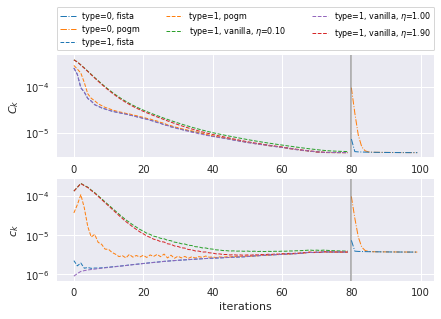

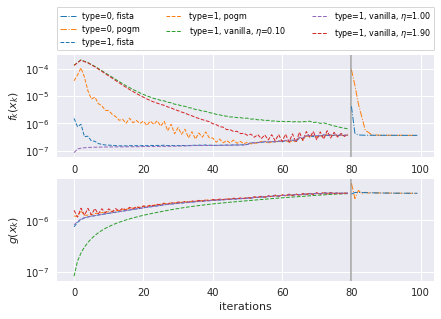

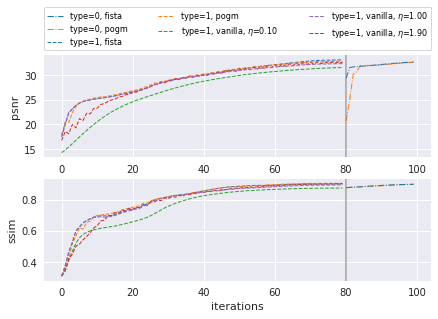

In [7]:
%matplotlib inline
online1 =multicoil.filter(mode='and', problem__fourier_type=1,
                          problem__regularisation__class__in=['GroupLASSO'],
                          problem__regularisation__weights=2e-6,
                                                        )
                
FIG_SIZE=(6.3*0.95, 6.3*0.95*0.707)                                   

online1 = online1.union(offline)
# online1 = online1.union(offline).union(online2)
online1 = online1.filter(results__psnr__min__ge=0)
f = plot_metrics(online1, metrics=('cost_off','cost',), max_iter=(20,-1,-1), log=True)
f.set_size_inches(FIG_SIZE, forward=True)
f.savefig(PLOT_DIR+'cost_typeI.pgf',bbox_inches='tight')
# tikz.save(PLOT_DIR+'cost_classical.tikz', **TIKZ_DICT)
f = plot_metrics(online1, metrics=('data_res_on','reg_res'), max_iter=(20,-1,-1), log=True)
f.set_size_inches(FIG_SIZE, forward=True)

f.savefig(PLOT_DIR+'data_res_typeI.pgf',bbox_inches='tight')


f = plot_metrics(online1, metrics=('psnr', 'ssim'), max_iter=(20,-1,-1),log=False)
f.set_size_inches(FIG_SIZE, forward=True)
f.savefig(PLOT_DIR+'metric_typeI.pgf',bbox_inches='tight')

# tikz.save(PLOT_DIR+'metrics_classical.tikz', **TIKZ_DICT)
e = online1.get(solver__algo='fista')
print(e.xf)
f=implot(ssos(e.xf[-1]),mask=square_mask)


f.savefig(PLOT_DIR+"online_fistaI.png",bbox_inches='tight')
!mogrify -trim "/home/pac/gits/rep/report-mri-online/plot/online_fistaI.png"

In [ ]:
# %matplotlib widget
online2 =  multicoil.filter(mode='and', problem__fourier_type=2,
                            problem__regularisation__class__in=['GroupLASSO'],
                            problem__regularisation__weights=2e-6,
                            solver__algo='vanilla',
                            solver__nb_run=2,
                            )

e = online2.get(solver__eta=1.0)
f=implot(ssos(e.xf[-1]),mask=square_mask)
f.savefig(PLOT_DIR+"online_vanillaII_GL1.png",bbox_inches='tight')
!mogrify -trim "/home/pac/gits/rep/report-mri-online/plot/online_vanillaII_GL1.png"


online2 = online2.filter(results__psnr__min__ge=0).filter(results__psnr__max__ge=24)
online2b = multicoil.filter(mode='and', problem__fourier_type=2,
                            problem__regularisation__class__in=['IdentityProx'],
                            solver__algo='vanilla',
                            solver__eta=1.,
                            solver__nb_run=2,
                            )

e = online2b.get(solver__eta=1.0)
f=implot(ssos(e.xf[-1]),mask=square_mask)

f.savefig(PLOT_DIR+"online_vanillaII_Id1.png",bbox_inches='tight')
!mogrify -trim "/home/pac/gits/rep/report-mri-online/plot/online_vanillaII_Id1.png"

online2 = online2.union(offline).union(online2b)
f = plot_metrics(online2, metrics=('cost_off', 'cost'), ignore_keys=('nb_scale','wavelet_name','weights','run'), ncol=2,log=True, val_pres=3)
f.set_size_inches(FIG_SIZE, forward=True)

f.savefig(PLOT_DIR+'cost_typeII.pgf',bbox_inches='tight')

f = plot_metrics(online2, metrics=('psnr', 'ssim'),ignore_keys=('nb_scale','wavelet_name','weights','run'),ncol=2,log=False,val_pres=3)
f.set_size_inches(FIG_SIZE, forward=True)

f.savefig(PLOT_DIR+'metric_typeII.pgf',bbox_inches='tight')


online2 =  multicoil.filter(mode='and', problem__fourier_type=2,
                            problem__regularisation__class__in=['GroupLASSO'],
                            problem__regularisation__weights=2e-6,
                            solver__algo='vanilla',
                            )
online3 = multicoil.filter(mode='and', problem__fourier_type=2,
                            problem__regularisation__class__in=['GroupLASSO'],
                            problem__regularisation__weights=2e-6,
                            solver__algo='momentum',
                            solver__beta__in=[1.000, 1.001, 1.01],
                            solver__eta=0.0125)

e = online3.get(solver__beta=1.001)
f=implot(ssos(e.xf[-1]),mask=square_mask)
f.savefig(PLOT_DIR+"online_momentumII.png",bbox_inches='tight')
!mogrify -trim "/home/pac/gits/rep/report-mri-online/plot/online_momentumII.png"

online2 = online2.union(online3)             
online2 = online2.filter(results__psnr__min__ge=0).filter(results__psnr__max__ge=24)

print(online2)
online2 = online2.union(offline)
f = plot_metrics(online2, metrics=('cost_off', 'cost'), ignore_keys=('weights','run'),log=True, ncol=2,val_pres=3)
f.set_size_inches(FIG_SIZE, forward=True)
f.savefig(PLOT_DIR+'cost_typeII_momentum.pgf',bbox_inches='tight')

f = plot_metrics(online2, metrics=('psnr', 'ssim'), ignore_keys=('weights','run'),log=False,ncol=2,val_pres=3)
f.set_size_inches(FIG_SIZE, forward=True)
f.savefig(PLOT_DIR+'metric_typeII_momentum.pgf',bbox_inches='tight')


In [25]:
from array2gif import write_gif
import numpy as np
from IPython.display import Image


def make_gif(exp, **kwargs):
    """
    Create a gif from the estimates
    """
    estimates = abs(np.array(map(ssos,exp.xf)))
    estimates = np.repeat(estimates[:,np.newaxis,...],3,axis=1)
    estimates *= (255.0/estimates.max())
    print(estimates.shape)
    filename = f"{hash(exp)}.gif"
    write_gif(estimates, filename, **kwargs)

In [47]:
from online.generators import Column2DKspaceGenerator, PartialColumn2DKspaceGenerator
full_k, real_img, mask_loc, final_mask = load_data(DATA_DIR,1,monocoil=True)
print(full_k.shape)
final_k = full_k* final_mask
print(final_k.shape)
typeIgen = Column2DKspaceGenerator(final_k, mask_cols=mask_loc,)
typeIIgen = PartialColumn2DKspaceGenerator(final_k, mask_cols=mask_loc,)


time = 20
typeIgenList = np.array([np.sqrt(np.sqrt(abs(k))) for k, m in typeIgen])
estimates = np.repeat(typeIgenList[:,np.newaxis,...],3,axis=1)
print(estimates.shape)
estimates *= (255.0/estimates.max())
fps=np.floor(len(estimates)/time)

write_gif(estimates, 'kspace_I.gif', fps)


typeIIgenList = np.array([np.sqrt(np.sqrt(abs(k))) for k, m in typeIIgen])
estimates = np.repeat(typeIIgenList[:,np.newaxis,...],3,axis=1)
print(estimates.shape)
estimates *= (255.0/estimates.max())
fps=np.floor(len(estimates)/time)

write_gif(estimates, 'kspace_II.gif', fps)




(640, 320)
(640, 320)
(81, 3, 640, 320)
(80, 3, 640, 320)


TypeError: unhashable type: 'slice'

In [62]:
expFISTA =  multicoil.get(mode='and',problem__fourier_type=1,
                    problem__regularisation__class='GroupLASSO', 
                    problem__regularisation__weights=2e-6, 
                    solver__algo='fista')
mask = square_mask
a = [f[np.ix_(mask.any(1), mask.any(0))] for f in expFISTA.xf['values']] 
estimates = np.repeat(np.array(a)[:,np.newaxis,...],3,axis=1)
estimates *= (255.0/estimates.max())
fps=np.floor(len(estimates)/time)

write_gif(estimates, 'fistaI.gif', fps)


expMomentum = multicoil.get(mode='and',problem__fourier_type=2,
                    problem__regularisation__class='GroupLASSO', 
                    problem__regularisation__weights=2e-6, 
                    solver__algo='momentum')
a = [f[np.ix_(mask.any(1), mask.any(0))] for f in expMomentum.xf] 

estimates = np.repeat(np.array(a)[:,np.newaxis,...],3,axis=1)
print(estimates.shape)
estimates *= (255.0/estimates.max())
fps=np.floor(len(estimates)/time)

write_gif(estimates, 'momentum.gif', fps)

query not specific enought, return first matching element
(80, 3, 320, 320)
